<a href="https://colab.research.google.com/github/Khey17/DogBreed-Iden/blob/main/DogBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-End Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

[Kaggle-Dataset](https://www.kaggle.com/competitions/dog-breed-identification/data)

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

[Evaluation](https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation)

## Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we're going to predict them).

In [ ]:
# Unzipping Data
# !unzip 'drive/path'

### Workspace

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU (GPU is 30 times faster than CPU in processing) ✅

In [ ]:
# Import Statements
import os
import datetime
import pandas as pd
import numpy as np
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import  train_test_split
import tensorflow as tf
import tensorflow_hub as hub
print('TensorFlow Version: ', tf.__version__)
print('TensorFlow Hub Version: ', hub.__version__)

# Check for GPU availabilty
print('GPU', 'available :)' if tf.config.list_physical_devices('GPU') else 'not available :(')

TensorFlow Version:  2.12.0
TensorFlow Hub Version:  0.13.0
GPU not available :(


### Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/DogBreed-Iden/Data/labels.csv')
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [ ]:
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# How many images are there of each breed?
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [ ]:
# On an average there are 82 images per class
labels['breed'].value_counts().median()

82.0

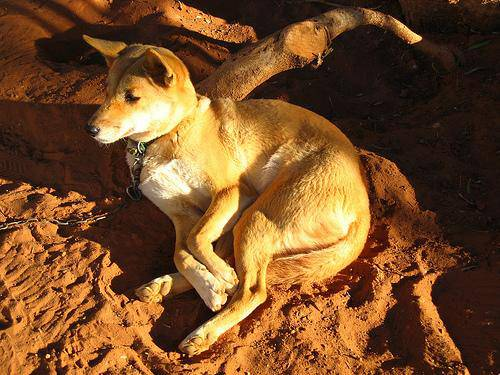

In [ ]:
# Preparing the Images
# Let's view an image
Image('/content/drive/MyDrive/DogBreed-Iden/Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

### Getting images and their labels

Let's get a list of all our image file path names.

In [ ]:
# Create a pathname from image ID's
filenames = ['/content/drive/MyDrive/DogBreed-Iden/Data/train/' + fname + '.jpg' 
             for fname in labels['id']]

# Check for first 10
filenames[0:10]

['/content/drive/MyDrive/DogBreed-Iden/Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames mactches number of actual image files
if len(os.listdir('/content/drive/MyDrive/DogBreed-Iden/Data/train')) == len(filenames):
  print('Filenames match actual amount of files! Proceed.')
else:
  print('Filenames do not match the actual amount of files! check the directory.')

Filenames match actual amount of files! Proceed.


### If the file count doesn't match the following must be done

In [ ]:
files = os.listdir('/content/drive/MyDrive/DogBreed-Iden/Data/train')
act_files = ['/content/drive/MyDrive/DogBreed-Iden/Data/train/' + f for f in files]
act_files[0:10]

['/content/drive/MyDrive/DogBreed-Iden/Data/train/e7c5692d044250d303a839d989132bf1.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e79a196a6e1772b9fa6b008b597d3a08.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e79f822b26adace4455db1fcd94ab47e.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e7af8f590b4fbdca0779f5e606ef91a1.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e827e6439b32ea68d51e894a7350c699.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e81b2d682dd2a2f5900b07551297f0a5.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e7ab74acdc860dfb93271901da085ffd.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e827550ea6ab19bbd4916d9952ee8765.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e79c6a88cf8da397ee67235a04741f2d.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e82fa6e85fd570b2f766635eed62fdf4.jpg']

In [ ]:
extra = list(set(act_files) - set(filenames))
extra

[]

In [ ]:
for f in extra:
  os.remove(f)

In [ ]:
len(os.listdir('/content/drive/MyDrive/DogBreed-Iden/Data/train'))

10222

### Turning Data labels into numbers/tensors

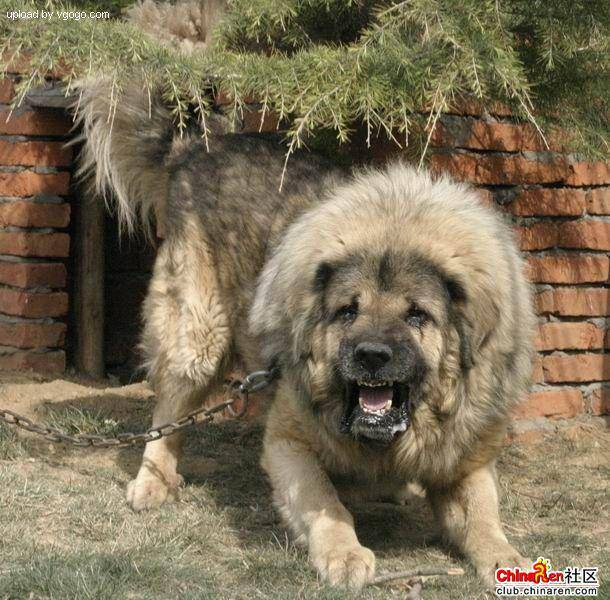

In [ ]:
Image(filenames[9000])

Since we've now got our training image filepaths in a list, Let's prepare our labels.

In [ ]:
np_labels = labels['breed'].to_numpy()
# labels = np.array(labels)
np_labels, len(np_labels)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

In [ ]:
# Find unique labels/Breeds
breeds = np.unique(np_labels)
breeds[:20], len(breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull'], dtype=object),
 120)

In [ ]:
# Turn a single label into an array of booleans
print(np_labels[0])
np_labels[0] == breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean = [label == breeds for label in np_labels]
boolean[0:2], len(boolean)

([array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False]),
  array([False, False, False, Fa

In [ ]:
# Examples turning boolean array into integers
print(np_labels[0]) # Original Label
print(np.where(breeds == np_labels[0])) # index where label occurs
print(boolean[0].argmax()) # index where label occurs in boolean array
print(boolean[0].astype(int)) # There will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(np_labels[1])
print(boolean[1].argmax())
print(boolean[1].astype(int))

dingo
37
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own Validation Set

In [ ]:
# Setup x and y variables
x = filenames
y = boolean

# Start off experimenting with ~1000 images and increase as needed
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:500}

# Split the data into train and validation sets
x_tr, x_val, y_tr, y_val = train_test_split(x[:NUM_IMAGES], 
                                            y[:NUM_IMAGES], 
                                            test_size=0.2, 
                                            random_state=42)
len(x_tr), len(y_tr), len(x_val), len(y_val)


(800, 800, 200, 200)

In [ ]:
x_tr[:2], y_tr[:2]

(['/content/drive/MyDrive/DogBreed-Iden/Data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/DogBreed-Iden/Data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, Fals

### Turning our images into tensors (Preprocessing Images)

To Preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`

In [ ]:
# Convert an image to a NumPy array
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# Turn image into a Tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, Let's make a function to preprocess them

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`

In [ ]:
# Def image size
IMG_SIZE = 224

# Create a function for preprocessing 
def preprocess(image_path, img_size=IMG_SIZE):
  '''
  Takes an image file path and turns the image into a Tensor.
  '''
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

### Check what the function does line by line for better practice

In [ ]:
tensor = tf.io.read_file(filenames[26]) # Weird Output : numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x
tensor = tf.image.decode_jpeg(tensor, channels=3)
tf.image.convert_image_dtype(tensor, tf.float32)

<tf.Tensor: shape=(500, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]],

       [[0.26666668, 0.3019608 , 0.2901961 ],
        [0.29803923, 0.33333334, 0.32156864],
        [0.3254902 , 0.36078432, 0.34901962],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.47058827, 0.52156866, 0.4431373 ],
        [0.48235297, 0.53333336, 0.454902  ]],

       ...,

       [[0.6784314 , 0.7843138 , 0.60784316],
        [0.64

### Turning our Data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (batch size) images at a time (can be manually adjusted) but the default is 32

In order to use TensorFlow effectively, we need our data in the form of TensorFlow effectively, we need our data in the form of Tensor Tuples which look this:

In [ ]:
# Create a simple function to return tuple (image, label)
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the associated label, processes the image and returns a tuple of (image, label)
  '''

  image = preprocess(image_path)
  return image, label

In [ ]:
# Demo of the above
(preprocess(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (x & y) into batches

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_batches(X, y=None, batch_size=BATCH_SIZE, val_data=False, tst_data=False):
  '''
  Creates batches of data out of image X and label y in pairs.
  Shuffles the data if it it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  '''

  # If the data is a dataset, we probably don't have a labels
  if tst_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths (no labels)
    data_batch = data.map(preprocess).batch(BATCH_SIZE)
    # return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif val_data:
    print('Creating a validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                             tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    # return data_batch

  else:
    print('Creating training data batches...')
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                              tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [ ]:
# Create training and validation data batches
tr_data = create_batches(x_tr, y_tr)
val_data = create_batches(x_val, y_val, val_data=True)

Creating training data batches...
Creating a validation data batches...


In [ ]:
# Check out the different attributes of our data batches
tr_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing our data

In [ ]:
# Create a function for viewing images in a data batch
def show_images(images, labels):
  '''
  Displays a plot of 25 images and their labels from a data batch.
  '''
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots(5 rows, 5 columns)
    ax = plt.subplot(5, 5, i + 1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')

In [ ]:
tr_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
tr_images, tr_labels = next(tr_data.as_numpy_iterator())
len(tr_images), len
(tr_labels)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

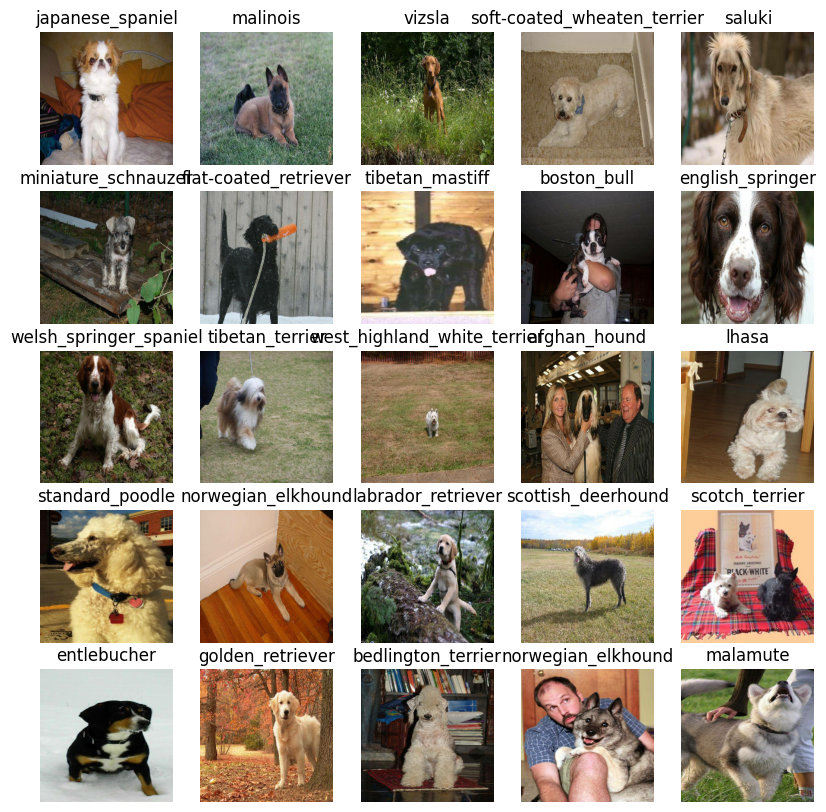

In [ ]:
# Now let's visualize the data in a training batch
show_images(tr_images, tr_labels)

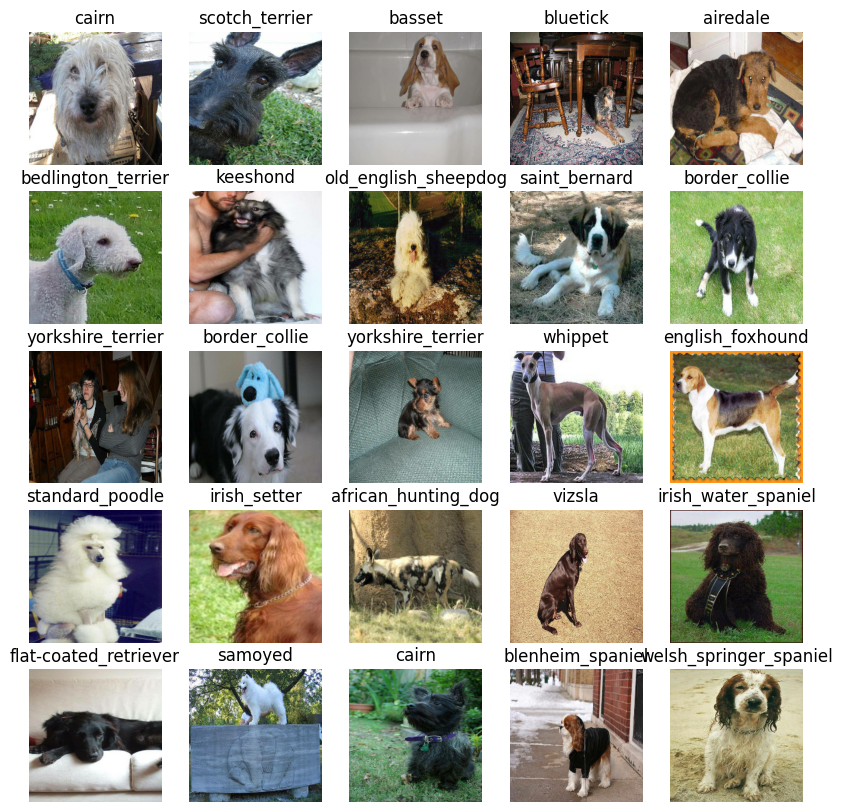

In [ ]:
# Now let's visualize validation data
val_images, val_labels =next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)

### Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from [TensorFlow Hub](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5)

In [ ]:
IMG_SIZE

224

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Input shape of the image

# Setup output shape of our model
OUTPUT_SHAPE = len(breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'


Now we've got our inputs, outputs and model ready to go.
Let's put them together into keras deep learning model!

Knowing this, Let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a keras model in sequential fashion (do this first, then this, then that)
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found [here](https://www.tensorflow.org/guide/keras/sequential_model)

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building model with: ', MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation='softmax') # Layer 2 (output layer)

  ])

  # Compilte the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save it's progress. check it's progress, check it's progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our model's progress and another for early stopping which prevents our model from training for too long.

**TensorBoard Callback**

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Create a function to build a TensorBoard callback
def tensorBoard():
  # Create a log dictionary for storing TensorBoard logs
  logdir = os.path.join('/content/drive/MyDrive/DogBreed-Iden/logs', 
                        # Make it so the logs got tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback (Preventing Overfitting)

Early stopping helps our model from overfitting by stopping the training if a certain evaluation metric stops improving.

[Overfitting](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [ ]:
# Creating early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

### Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type: 'slider', min:10, max:100, step:10}

# cross-check to make sure we're still running on a GPU
print('GPU', 'available!' if tf.config.list_physical_devices('GPU') else 'not available!')

GPU available!


Let's create a function which trains a model.

* Create a model using create_model()
* Setup a TensorBoard callback using tensorBoard()
* Call the `fit()` function on our model passing it in the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  '''
  Trains a given model and returns the trained version.
  '''
  # Create a model
  model = create_model()

  # Create a new TensorBoard session everytime we train a model
  tensorboard = tensorBoard()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=tr_data, epochs=NUM_EPOCHS, 
            validation_data=val_data, validation_freq=1, 
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 127s 3s/step - loss: 4.7033 - accuracy: 0.0913 - val_loss: 3.4870 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 4s 146ms/step - loss: 1.7182 - accuracy: 0.6550 - val_loss: 2.2052 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 4s 149ms/step - loss: 0.5992 - accuracy: 0.9237 - val_loss: 1.7093 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 4s 181ms/step - loss: 0.2648 - accuracy: 0.9850 - val_loss: 1.4940 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 3s 118ms/step - loss: 0.1525 - accuracy: 0.9962 - val_loss: 1.3955 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 3s 119ms/step - loss: 0.1036 - accuracy: 1.0000 - val_loss: 1.3590 - val_accuracy: 0.6550
Epoch 7/100
25/25 [==============================

**Question**: It looks like our model is overfitting, what are some ways to prevent overfitting in deep learning neural networks?

**Note**: Overfitting to begin with is a good thing! It means our model is learning!!!

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize it's contents.

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/DogBreed-Iden/logs

<IPython.core.display.Javascript object>

### Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 103ms/step


array([[8.50806478e-04, 4.17903320e-05, 8.59869469e-04, ...,
        3.52337869e-04, 3.59571095e-05, 1.24856981e-03],
       [5.79065760e-04, 7.05877843e-04, 6.62264740e-03, ...,
        1.14017421e-04, 9.16419143e-04, 1.62483178e-04],
       [4.04449820e-05, 4.80888906e-04, 4.42484634e-05, ...,
        1.13220385e-05, 1.75094956e-05, 8.42935813e-04],
       ...,
       [1.47088861e-06, 6.23091773e-06, 1.30114013e-05, ...,
        3.63984896e-06, 4.86991803e-06, 1.93621236e-06],
       [3.87564208e-03, 1.43068930e-04, 2.46745076e-05, ...,
        2.53824146e-05, 4.92345280e-05, 4.39931685e-03],
       [3.55763361e-04, 3.40098131e-06, 4.21600562e-05, ...,
        1.67710590e-03, 2.32659615e-04, 1.22526726e-05]], dtype=float32)

In [ ]:
predictions.shape, len(y_val)

((200, 120), 200)

In [ ]:
# First Prediction
index = 0
print(np.sum(predictions[index])) # The one with highest probability is the output label and sum will be close to 1
print(f'Max Probability: {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predicted label: {breeds[np.argmax(predictions[index])]}')

0.9999999
Max Probability: 0.2659316062927246
Sum: 0.9999998807907104
Max index: 26
Predicted label: cairn


Having the above functionality is great but we want to be able to do it scale.

And it would be even better if we could see the image the prediction is being made on!
 
 **Note:** Prediction probabilities are also known as Confidence Levels

In [ ]:
# Turn probabilities into their respective labels (easier to understand)
def get_pred_label(prediction_probabilities):
  '''
  Turns an array of prediction probabilities into a label.
  '''
  return breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[index])
pred_label

'cairn'

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
# Create a function 
def unbatchify(data):
  '''
  Takes a batched dataset of (image, label) Tensors and returns seperate arrays
  of images and labels.
  '''
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(breeds[np.argmax(label)])

  return images, labels

# Unbatchify the validation_data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

### How the function works

In [ ]:
images_ = []
labels_ = []

# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

len(images_), len(labels_), images_[0], labels_[0]

(200,
 200,
 array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772

Now we've got ways to get:
* Prediction labels
* Validation labels (Truth Labels)
* Validation Images

Let's make some function to visualize these labels

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, it's predicted probability , the truth label and the target image on a single plot.✅

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  '''
  View the prediction, ground truth and image for sample n
  '''
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  #Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Change plot title to be predicted, probabilty of prediction and truth label
  plt.title('{} {:2.0f}% {}'.format(pred_label, np.max(pred_prob)*100, true_label), 
            color=color)

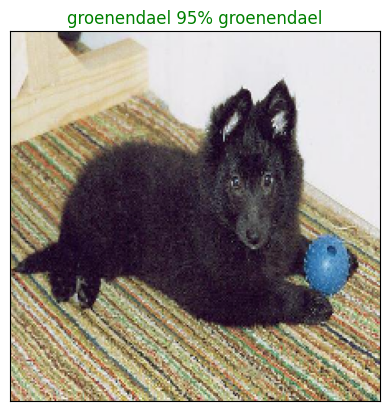

In [ ]:
plot_pred(prediction_probabilities=predictions, 
          labels=val_labels, images=val_images, n=77)

Now we've got one function to visualize our models top 10 predictions:

This function will:
* Take an input of prediction probabilities array and ground truth array and an integer✅
* Find the prediction using `get_pred_label()`✅
* Find the top 10:
  * Prediction probabilties indexes✅
  * Prediction probabilities values✅
  * Prediction labels✅
* Plot the top 10 prediction probability values and labels, coloring the true label green✅

In [ ]:
def confidence_score(prediction_probabilities, labels, n=1):
  '''
  Top 10 highes confidences along with the truth label for sample n.
  '''
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  
  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), top_10_pred_values, color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)), labels=top_10_pred_labels, rotation='vertical')

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

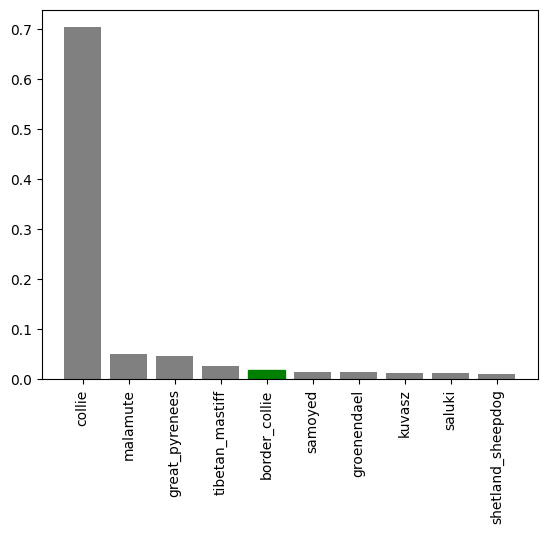

In [ ]:
confidence_score(prediction_probabilities=predictions, labels=val_labels, n=9)

In [ ]:
breeds[predictions[0].argsort()[-10:][::-1]]

array(['cairn', 'irish_wolfhound', 'border_terrier',
       'soft-coated_wheaten_terrier', 'lhasa', 'dandie_dinmont',
       'shih-tzu', 'maltese_dog', 'tibetan_terrier', 'norfolk_terrier'],
      dtype=object)

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.2659316 , 0.17661162, 0.11600166, 0.08308525, 0.06262075,
       0.04094332, 0.03999755, 0.03171029, 0.02752001, 0.02279325],
      dtype=float32)

Now we'got some function to help us visualize our predictions and evaluate our model, le's check out a few.

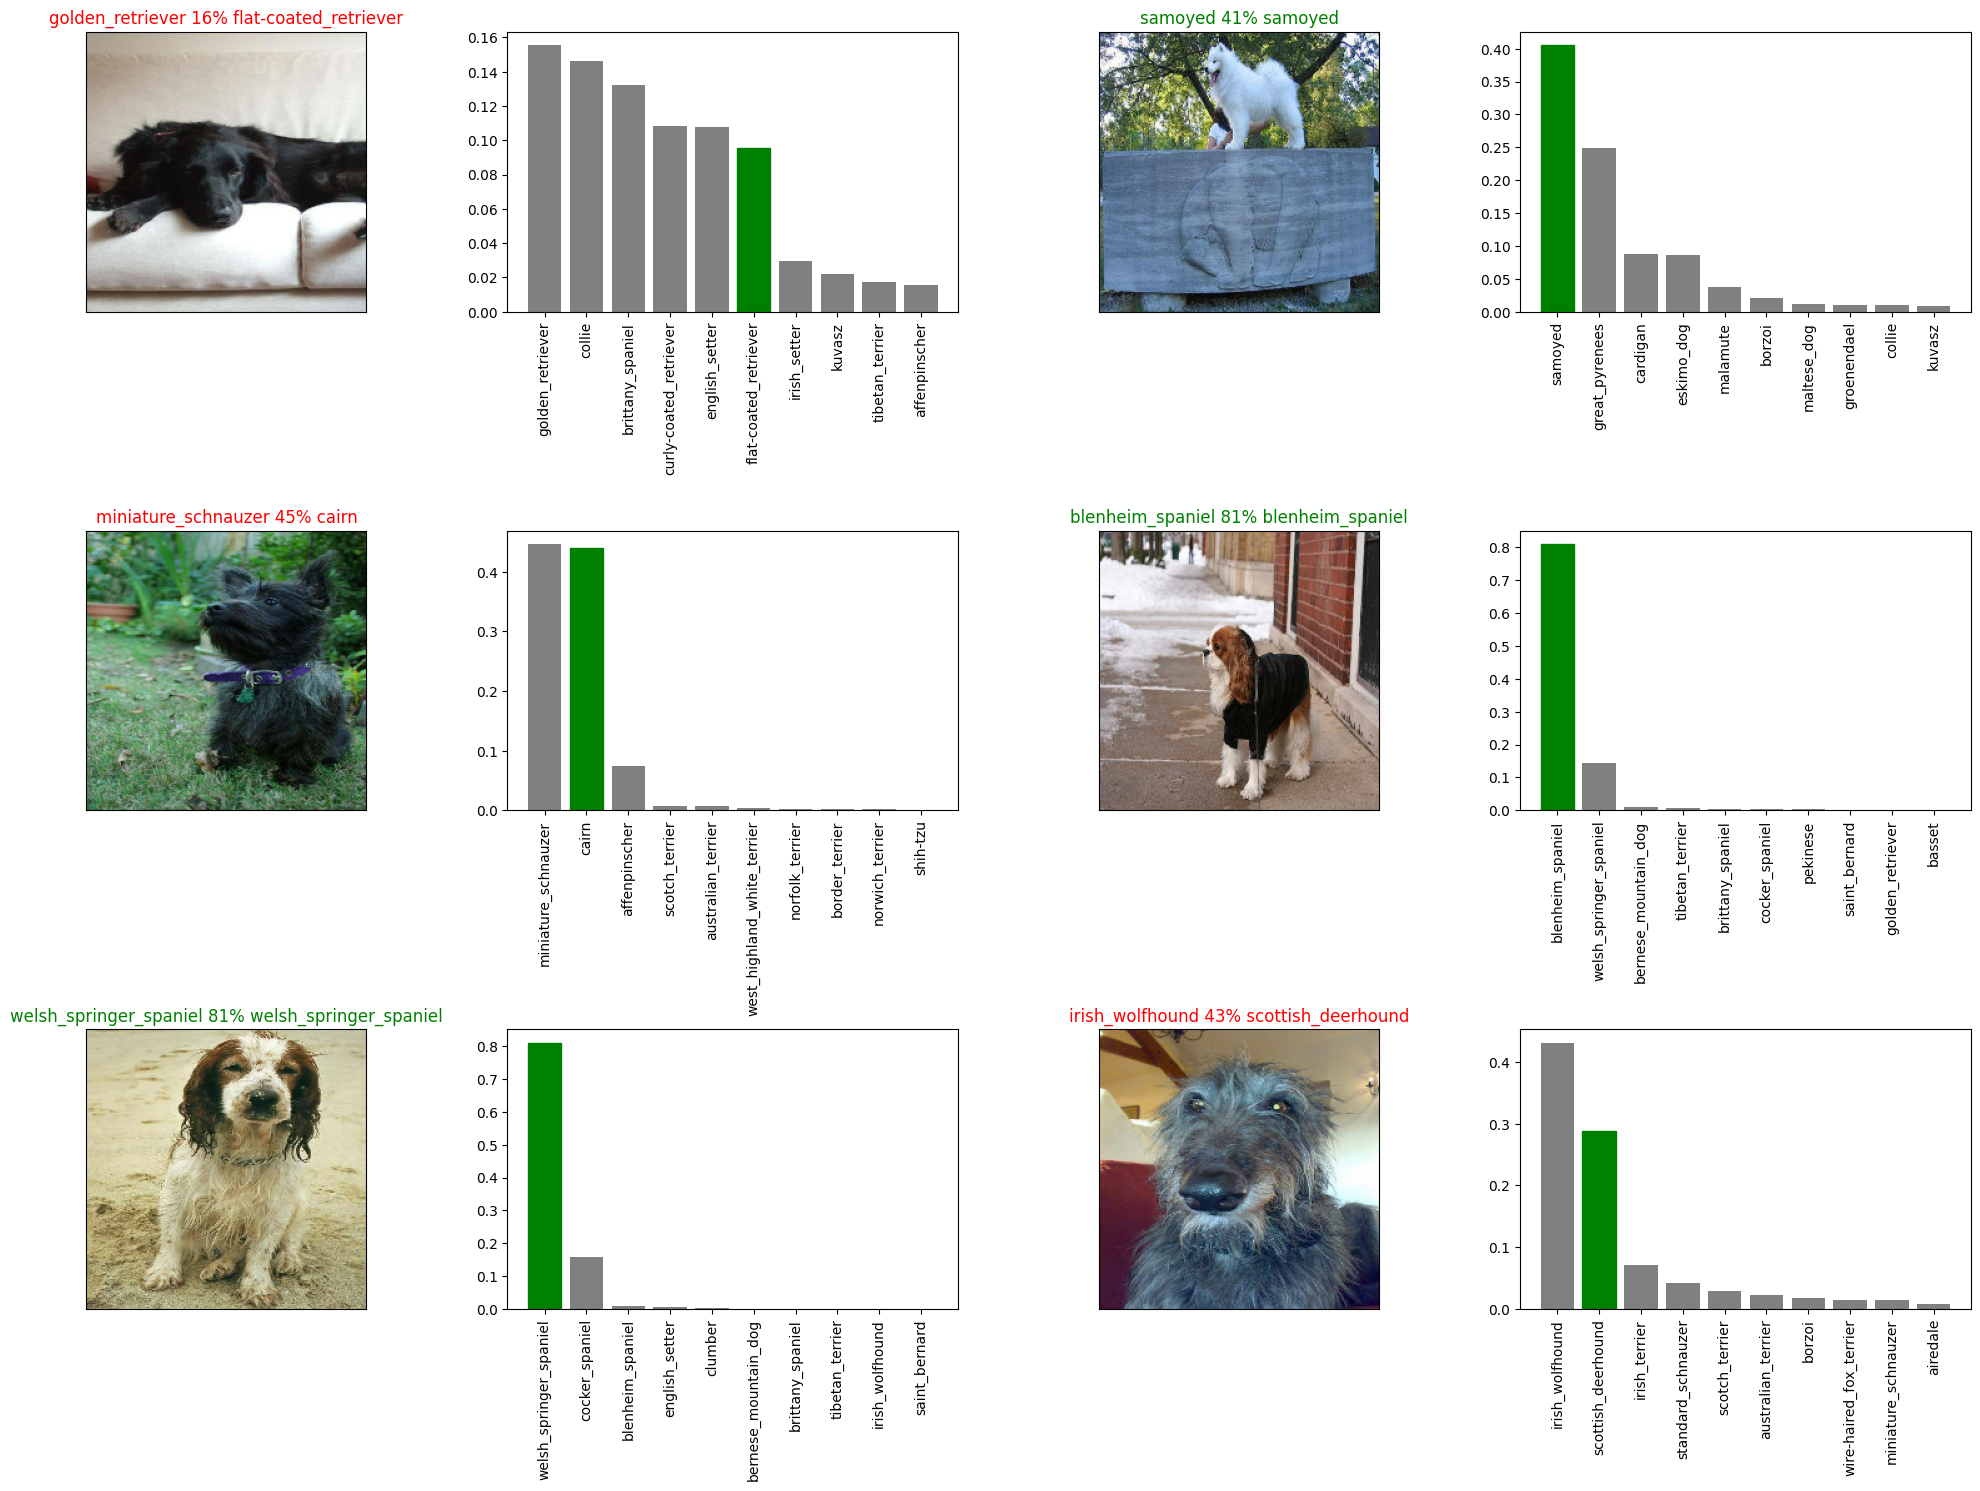

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions, 
            labels=val_labels, images=val_images, 
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  confidence_score(prediction_probabilities=predictions, 
                   labels=val_labels, n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

### Confusion Matrix for a Multiclassification model

In [ ]:
tf.math.confusion_matrix(val_labels, predictions)

UnimplementedError: ignored

### Save and load the trained the model

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  '''
  Saves a given model ina models directory and appends a suffix (string).
  '''
  modeldir = os.path.join('/content/drive/MyDrive/DogBreed-Iden/models', 
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path = modeldir + '-' + suffix + '.h5' # save format of model
  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  '''
  Loads a saved model from a specific path.
  '''
  print(f'Loading saved model from: {model_path}')
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={'KerasLayer':hub.KerasLayer})
  return model

Now we've got functions to save and load a trained a model, let's make it work!

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix='1000-images-mobilenetv2-Adam')

Saving model to: /content/drive/MyDrive/DogBreed-Iden/models/20230407-11541680868470-1000-images-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/DogBreed-Iden/models/20230407-11541680868470-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model('/content/drive/MyDrive/DogBreed-Iden/models/20230407-11541680868470-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/MyDrive/DogBreed-Iden/models/20230407-11541680868470-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 86ms/step - loss: 1.1835 - accuracy: 0.6950


[1.1834635734558105, 0.6949999928474426]

In [ ]:
# Evaluated the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 89ms/step - loss: 1.1835 - accuracy: 0.6950


[1.1834635734558105, 0.6949999928474426]

### Training a big dog model🐶 (on full data)

In [ ]:
len(x), len(y)

(10222, 10222)

In [ ]:
# Create a data batch with the full dataset
data = create_batches(x, y)

Creating training data batches...


In [ ]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for the full dataset
dogBreed = create_model()

# Create full model callbacks
data_tensorboard = tensorBoard()
# No validation set when training on all the data, so we can't monitor validation accuracy
data_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Fit the full model to the full data
dogBreed.fit(x=data, epochs=NUM_EPOCHS, 
             callbacks=[data_tensorboard, data_early_stopping])

Epoch 1/100
320/320 [==============================] - 37s 103ms/step - loss: 1.3351 - accuracy: 0.6685
Epoch 2/100
320/320 [==============================] - 33s 104ms/step - loss: 0.4006 - accuracy: 0.8803
Epoch 3/100
320/320 [==============================] - 32s 101ms/step - loss: 0.2351 - accuracy: 0.9344
Epoch 4/100
320/320 [==============================] - 35s 108ms/step - loss: 0.1532 - accuracy: 0.9643
Epoch 5/100
320/320 [==============================] - 33s 104ms/step - loss: 0.1051 - accuracy: 0.9786
Epoch 6/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0760 - accuracy: 0.9888
Epoch 7/100
320/320 [==============================] - 33s 104ms/step - loss: 0.0594 - accuracy: 0.9901
Epoch 8/100
320/320 [==============================] - 32s 101ms/step - loss: 0.0451 - accuracy: 0.9942
Epoch 9/100
320/320 [==============================] - 33s 104ms/step - loss: 0.0361 - accuracy: 0.9963
Epoch 10/100
320/320 [==============================] - 32s 101m

In [ ]:
save_model(dogBreed, suffix='full-image-set-mobilenetv2-Adam')

Saving model to: /content/drive/MyDrive/DogBreed-Iden/models/20230407-12291680870572-full-image-set-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/DogBreed-Iden/models/20230407-12291680870572-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
breed = load_model('/content/drive/MyDrive/DogBreed-Iden/models/20230407-12291680870572-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/MyDrive/DogBreed-Iden/models/20230407-12291680870572-full-image-set-mobilenetv2-Adam.h5


### Making predictions on the test data set

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we've created `create_data_batches()` earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image Filenames✅
* Convert the filenames into test data batch using `create_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).
* Make a prediction array by passing the test batches `predict()` method called on our model.

In [ ]:
# Load the test image filenames
test_path = '/content/drive/MyDrive/DogBreed-Iden/Data/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/DogBreed-Iden/Data/test/e774fbfeb4b712ca042f93edea3835af.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/test/e70c62f51defaa5295fe3e52099c4ce3.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/test/e8763575a23f1e1a86788b82bd105f07.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/test/e864985e40823a56d3ad8594066d0641.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/test/e8db9ef8056880a187f3768565f215d9.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/test/e7fcdf9671a6593b638cbee42842f981.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/test/e83fec66a32873298df9fa5fdac113aa.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/test/e7f95aabf775a636b3893ffa120adaf9.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/test/e857866af777793d2c114b09ea7a685a.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/test/e7e9dd51302fe08c1c89a550e183cf07.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batches
test_data = create_batches(test_filenames, tst_data=True)
test_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run (abt an hour)

In [ ]:
# Make predictions on test data batch using loaded full model
final_preds = breed.predict(test_data, verbose=1)

324/324 [==============================] - 151s 452ms/step


In [ ]:
len(final_preds)

10357

In [ ]:
# Save predictions (Numpy Array) to csv file (access later)
np.savetxt('/content/drive/MyDrive/DogBreed-Iden/predictions.csv', final_preds, delimiter=',')

NameError: ignored

In [ ]:
# Load predictions (Numpy Array) from csv file
final_preds = np.loadtxt('/content/drive/MyDrive/DogBreed-Iden/predictions.csv', delimiter=',')

In [ ]:
final_preds.shape

(10357, 120)

In [ ]:
get_pred_label(final_preds[5])

NameError: ignored

### Preparing Test dataset predictions for kaggle

Looking at the (Kaggle sample submission)[https://www.kaggle.com/competitions/dog-breed-identification/data?select=sample_submission.csv], we find that it wants our models prediction probability outputs in a DataFrame with an ID and a column for each different dog breed. https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:

* Create a pandas DataFrame with an ID column as well as a column for each dog breed.✅
* Add data to the ID column by extracting the test image ID's from their filepaths.✅
* Add data (the prediction probabilities) to each of the dog breed columns using the unique_breeds list and the test_predictions list.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
# Create a pandas df with empy columns
df = pd.DataFrame(columns=['id'] + list(breeds))
df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[:5]

['e774fbfeb4b712ca042f93edea3835af',
 'e70c62f51defaa5295fe3e52099c4ce3',
 'e8763575a23f1e1a86788b82bd105f07',
 'e864985e40823a56d3ad8594066d0641',
 'e8db9ef8056880a187f3768565f215d9']

In [ ]:
df['id'] = test_ids
df[list(breeds)] = final_preds
df.head()

id  affenpinscher  afghan_hound  \
0  e774fbfeb4b712ca042f93edea3835af   3.705467e-08  2.688248e-09   
1  e70c62f51defaa5295fe3e52099c4ce3   1.219369e-12  5.476452e-10   
2  e8763575a23f1e1a86788b82bd105f07   1.156986e-10  5.171211e-09   
3  e864985e40823a56d3ad8594066d0641   2.325703e-07  3.235278e-08   
4  e8db9ef8056880a187f3768565f215d9   1.521869e-09  1.209686e-07   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.924467e-10  2.880157e-04                    2.543964e-09   
1         4.395573e-09  5.288440e-12                    1.640754e-11   
2         2.249098e-11  6.350488e-10                    2.568538e-09   
3         1.346992e-06  3.911954e-07                    2.710774e-06   
4         2.953613e-09  3.592492e-07                    2.188507e-11   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.664002e-07        7.766524e-07  1.467620e-09  8.703331e-09  ...   
1  9.720258e-11        3.822279e-12  7.715814e-08  8.844079e-12  ...   
2  2.018420e-12        1.274816e-14  3.867000e-12  8.425467e-08  ...   
3  2.871533e-09        4.611052e-09  5.447513e-11  2.774046e-11  ...   
4  3.457475e-06        4.140019e-09  1.347288e-10  8.072273e-08  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  7.688665e-09  1.953694e-08  7.407478e-07  2.222557e-09  1.345043e-10   
1  9.171566e-12  3.592739e-09  2.066102e-12  6.161974e-12  1.713047e-10   
2  5.942510e-09  4.052697e-12  5.906707e-14  5.260255e-13  1.229676e-10   
3  5.880977e-09  2.946429e-08  1.504346e-08  1.440748e-08  2.750713e-05   
4  2.933327e-10  6.878774e-09  5.909891e-08  3.420826e-06  2.841118e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            1.399236e-08                 1.467351e-09  7.820991e-07   
1            4.335195e-11                 5.959012e-11  2.533202e-10   
2            1.399394e-12                 5.415810e-12  4.558884e-11   
3            7.046336e-08                 1.599915e-08  1.750423e-04   
4            4.338563e-01                 4.096526e-09  5.111354e-09   

   wire-haired_fox_terrier  yorkshire_terrier  
0             3.699452e-05       1.309378e-08  
1             8.315343e-09       8.449210e-12  
2             4.305417e-12       1.311280e-09  
3             8.341164e-07       3.293039e-07  
4             1.340948e-06       2.397399e-07  

[5 rows x 121 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/DogBreed-Iden/Kaggle-Submission-mobilenetV2.csv', index=False)